<a href="https://colab.research.google.com/github/qiao-hao-git/ML_Code/blob/main/Logistic_Regression_with_a_Neural_Network_mindset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [30]:
def load_dataset():
    train_dataset = h5py.File('/content/sample_data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/sample_data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

y = [1], it's a 'cat


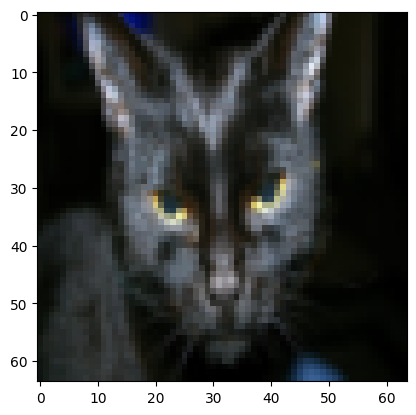

In [31]:
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

index = 25
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))

In [32]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [33]:
train_set_x_flatten = train_set_x_orig.reshape(m_train,-1).T
test_set_x_flatten = test_set_x_orig.reshape(m_test,-1).T

print(train_set_x_flatten)
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [34]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [35]:
def sigmoid(x):
  s = 1.0/(1.0+np.exp(-1.0*x))
  return s

print("sigmoid([0,2])=" + str(sigmoid(np.array([0,2]))))

sigmoid([0,2])=[0.5        0.88079708]


In [36]:
def initialize_with_zero(dim):
  w = np.zeros((dim,1))
  b = 0

  assert(w.shape==(dim,1))
  assert(b==0)

  return w,b

In [37]:
dim = 2
w,b = initialize_with_zero(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [38]:
def propagate(w,b,X,Y):
  m = X.shape[1]

  A = sigmoid(np.dot(w.T,X)+b)
  cost = -(1.0/m)*(np.sum(Y*np.log(A)+np.sum((1-Y)*np.log(1-A))))

  dw = (1.0/m)*np.dot(X,(A-Y).T)
  db = (1.0/m)*np.sum(A-Y)

  assert(dw.shape==w.shape)
  assert(db.dtype==float)
  cost = np.squeeze(cost)
  assert(cost.shape==())

  grads = {"dw":dw,"db":db}
  return grads,cost

In [39]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 13.801549415524345


In [40]:
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost=False):
  costs = []
  for i in range(num_iterations):
    grad,cost = propagate(w,b,X,Y)
    dw = grad["dw"]
    db = grad["db"]

    w = w-learning_rate*dw
    b = b-learning_rate*db

    if i%100==0:
      costs.append(cost)

    if print_cost and i%100==0:
      print("Cost after iteration %i:%f"%(i,cost))

  params = {"w":w,"b":b}
  grads = {"dw":dw,"db":db}

  return params,grads,costs

In [41]:
params,grads,costs = optimize(w,b,X,Y,num_iterations=100,learning_rate=0.009,print_cost=False)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [42]:
def predict(w,b,X):
  m = X.shape[1]
  Y_prediction = np.zeros((1,m))
  w = w.reshape(X.shape[0],1)

  A = sigmoid(np.dot(w.T,X)+b)

  for i in range(A.shape[1]):
    if A[0,i]>0.5:
      Y_prediction[0,i] = 1
    else:
      Y_prediction[0,i] = 0
  assert(Y_prediction.shape==(1,m))

  return Y_prediction

In [43]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [44]:
def model(X_train,X_test,Y_train,Y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
  w,b = initialize_with_zero(X_train.shape[0])
  params,grads,costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)

  w = params["w"]
  b = params["b"]

  Y_prediction_test = predict(w,b,X_test)
  Y_prediction_train = predict(w,b,X_train)

  print("test accuracy:{}%".format(100-np.mean(np.abs(Y_prediction_test-Y_test))*100))
  print("train accuracy:{}%".format(100-np.mean(np.abs(Y_prediction_train-Y_train))*100))

  d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
  return d

In [45]:
d = model(train_set_x,test_set_x,train_set_y,test_set_y,num_iterations=2000,learning_rate=0.005,print_cost=False)

test accuracy:70.0%
train accuracy:99.04306220095694%


y = 1, you predicted that it is a "cat" picture.
1.0
b'cat'


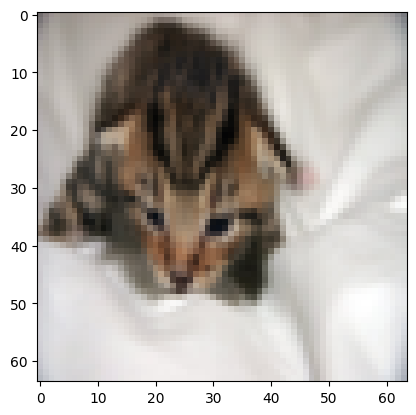

In [46]:
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" +
      classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")
print(d["Y_prediction_test"][0, index])
print(classes[int(d["Y_prediction_test"][0, index])])

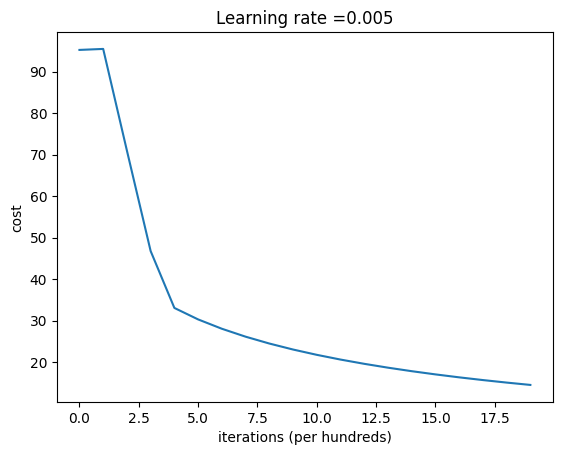

In [47]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
test accuracy:68.0%
train accuracy:99.52153110047847%

-------------------------------------------------------

learning rate is: 0.001
test accuracy:64.0%
train accuracy:88.99521531100478%

-------------------------------------------------------

learning rate is: 0.0001
test accuracy:36.0%
train accuracy:68.42105263157895%

-------------------------------------------------------



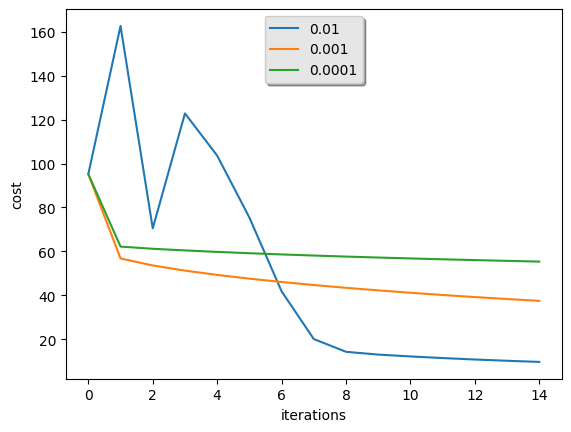

In [48]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x,test_set_x,train_set_y,test_set_y,num_iterations=1500,learning_rate=i,print_cost=False)
    print('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

<ipython-input-55-b5300c689b87>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(fname)


(3, 64, 64)
y = 0.0, your algorithm predicts a "non-cat" picture.


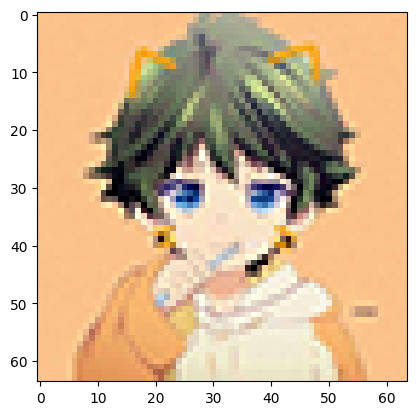

In [55]:
import imageio
my_image = "my_image.jpg"
fname = "/content/sample_data/" + my_image
image = imageio.imread(fname)
print(image.shape)

reshaped_image = np.transpose(image,(1,2,0))
my_image = image.reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(reshaped_image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" +
      classes[int(np.squeeze(my_predicted_image))].decode("utf-8") +  "\" picture.")